#### The pymongo library must be installed
#### Ensure that version 3.12 is installed
#### Run this command one time from the Anaconda command prompt to install pymongo --> python -m pip install pymongo==3.12.0

## install the following libraries

In [1]:
from pymongo import MongoClient
from pandas import json_normalize
import json
from pprint import pprint as pp
import pandas as pd

In [2]:
client = MongoClient ('mongodb://34.171.140.166:27017/Scenario3')

In [3]:
db=client.Scenario3
print (db)

Database(MongoClient(host=['34.171.140.166:27017'], document_class=dict, tz_aware=False, connect=True), 'Scenario3')


# Query Documents from restaurants collection showing various cuisine types in Manhattan

In [4]:
with client:
    db = client.Scenario3
    #getCollection("restaurants")
    qresult1 = db.restaurants.find()
    print(type(qresult1))

<class 'pymongo.cursor.Cursor'>


In [5]:
res=list(qresult1)

df = pd.DataFrame.from_records(res)

df2 = pd.DataFrame.from_records(json_normalize(res))

In [6]:
df2.head(2)

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode
0,646a22f720cec63db35433b0,Bronx,Bakery,"[{'date': 2014-03-03 00:00:00, 'grade': 'A', '...",Morris Park Bake Shop,30075445,1007,"[-73.856077, 40.848447]",Morris Park Ave,10462
1,646a22f720cec63db35433b1,Brooklyn,Hamburgers,"[{'date': 2014-12-30 00:00:00, 'grade': 'A', '...",Wendy'S,30112340,469,"[-73.961704, 40.662942]",Flatbush Avenue,11225


In [7]:
df.columns

Index(['_id', 'address', 'borough', 'cuisine', 'grades', 'name',
       'restaurant_id'],
      dtype='object')

In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25359 entries, 0 to 25358
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   _id               25359 non-null  object
 1   borough           25359 non-null  object
 2   cuisine           25359 non-null  object
 3   grades            25359 non-null  object
 4   name              25359 non-null  object
 5   restaurant_id     25359 non-null  object
 6   address.building  25359 non-null  object
 7   address.coord     25359 non-null  object
 8   address.street    25359 non-null  object
 9   address.zipcode   25359 non-null  object
dtypes: object(10)
memory usage: 1.9+ MB


In [9]:
df2.apply(lambda x: sum(x.isnull()),axis=0) # checking missing values in each column of restaurant dataset

_id                 0
borough             0
cuisine             0
grades              0
name                0
restaurant_id       0
address.building    0
address.coord       0
address.street      0
address.zipcode     0
dtype: int64

In [10]:
#list the row labels and column names
df2.axes

[RangeIndex(start=0, stop=25359, step=1),
 Index(['_id', 'borough', 'cuisine', 'grades', 'name', 'restaurant_id',
        'address.building', 'address.coord', 'address.street',
        'address.zipcode'],
       dtype='object')]

In [11]:
#total number of elements in the data frame
df2.size

253590

In [12]:
#number of rows and columns
df2.shape

(25359, 10)

In [13]:
#output basic statistics for the numeric columns
df2.describe()

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode
count,25359,25359,25359,25359,25359,25359,25359,25359,25359,25359
unique,25359,6,85,23121,20470,25359,7990,22103,2790,213
top,646a22f720cec63db35433b0,Manhattan,American,[],Subway,30075445,1,"[-73.77813909999999, 40.6413111]",Broadway,10003
freq,1,10259,6183,738,421,1,209,84,928,686


In [14]:
df2['cuisine'].unique()

array(['Bakery', 'Hamburgers', 'Irish', 'American', 'Jewish/Kosher',
       'Delicatessen', 'Ice Cream, Gelato, Yogurt, Ices', 'Chinese',
       'Chicken', 'Turkish', 'Caribbean', 'Donuts',
       'Sandwiches/Salads/Mixed Buffet', 'Bagels/Pretzels', 'Continental',
       'Pizza', 'Italian', 'Steak', 'Polish',
       'Latin (Cuban, Dominican, Puerto Rican, South & Central American)',
       'German', 'French', 'Pizza/Italian', 'Mexican', 'Spanish',
       'Café/Coffee/Tea', 'Tex-Mex', 'Pancakes/Waffles', 'Soul Food',
       'Seafood', 'Hotdogs', 'Greek', 'Not Listed/Not Applicable',
       'African', 'Japanese', 'Indian', 'Armenian', 'Thai',
       'Chinese/Cuban', 'Mediterranean', 'Korean',
       'Bottled beverages, including water, sodas, juices, etc.',
       'Russian', 'Eastern European', 'Middle Eastern', 'Asian',
       'Ethiopian', 'Vegetarian', 'Barbecue', 'Egyptian', 'English',
       'Other', 'Sandwiches', 'Portuguese', 'Indonesian',
       'Chinese/Japanese', 'Filipino', 'Ju

In [15]:
df2['cuisine'].value_counts()  #find the total number of each cuisine

American           6183
Chinese            2418
Café/Coffee/Tea    1214
Pizza              1163
Italian            1069
                   ... 
Iranian               2
Californian           1
Polynesian            1
Creole/Cajun          1
Chilean               1
Name: cuisine, Length: 85, dtype: int64

In [16]:
 #select the rows that have at least one missing value
df2[df2.isnull().any(axis=1)].head()

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode


In [54]:
# filter all the rows where the grades value is missing
df21 = df2 [ df2['grades'].notnull(  )]
df21.head()

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode
0,646a22f720cec63db35433b0,Bronx,Bakery,"[{'date': 2014-03-03 00:00:00, 'grade': 'A', '...",Morris Park Bake Shop,30075445,1007,"[-73.856077, 40.848447]",Morris Park Ave,10462
1,646a22f720cec63db35433b1,Brooklyn,Hamburgers,"[{'date': 2014-12-30 00:00:00, 'grade': 'A', '...",Wendy'S,30112340,469,"[-73.961704, 40.662942]",Flatbush Avenue,11225
2,646a22f720cec63db35433b2,Manhattan,Irish,"[{'date': 2014-09-06 00:00:00, 'grade': 'A', '...",Dj Reynolds Pub And Restaurant,30191841,351,"[-73.98513559999999, 40.7676919]",West 57 Street,10019
3,646a22f720cec63db35433b3,Brooklyn,American,"[{'date': 2014-06-10 00:00:00, 'grade': 'A', '...",Riviera Caterer,40356018,2780,"[-73.98241999999999, 40.579505]",Stillwell Avenue,11224
4,646a22f720cec63db35433b4,Queens,Jewish/Kosher,"[{'date': 2014-11-24 00:00:00, 'grade': 'Z', '...",Tov Kosher Kitchen,40356068,97-22,"[-73.8601152, 40.7311739]",63 Road,11374


In [55]:
# remove all the observations with missing values
df2 = df2.dropna()

In [56]:
df2.columns

Index(['_id', 'borough', 'cuisine', 'grades', 'name', 'restaurant_id',
       'address.building', 'address.coord', 'address.street',
       'address.zipcode'],
      dtype='object')

In [57]:
df2['borough'].unique()  #total number of distinct boroughs

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'Missing'], dtype=object)

In [58]:
# get frequency table for a categorical or binary column
df2.columns

Index(['_id', 'borough', 'cuisine', 'grades', 'name', 'restaurant_id',
       'address.building', 'address.coord', 'address.street',
       'address.zipcode'],
      dtype='object')

In [59]:
#use pandas function crosstab ()---- finding the frequency of boroughs
pd.crosstab(index=df2['borough'], columns="count")

col_0,count
borough,
Bronx,2338
Brooklyn,6086
Manhattan,10259
Missing,51
Queens,5656
Staten Island,969


In [60]:
# two way table showing the total number of cuisine in each borough
pd.crosstab(index=df2['borough'], columns=df2['cuisine'],margins=True)

cuisine,Afghan,African,American,Armenian,Asian,Australian,Bagels/Pretzels,Bakery,Bangladeshi,Barbecue,...,Southwestern,Spanish,Steak,Tapas,Tex-Mex,Thai,Turkish,Vegetarian,Vietnamese/Cambodian/Malaysia,All
borough,,,,,,,,,,,,,,,,,,,,,
Bronx,0,31,411,2,4,0,3,71,5,2,...,0,127,4,0,11,2,0,0,0,2338
Brooklyn,1,13,1273,9,54,5,49,173,5,19,...,1,138,7,4,46,66,26,31,21,6086
Manhattan,4,17,3205,19,134,10,58,221,7,22,...,4,133,61,21,53,154,35,59,38,10259
Missing,0,0,10,0,1,0,0,2,0,0,...,0,1,0,0,0,0,0,0,0,51
Queens,9,5,1040,8,104,1,44,204,19,7,...,1,219,13,3,28,62,8,12,7,5656
Staten Island,0,2,244,2,12,0,14,20,0,2,...,3,19,1,0,5,1,1,0,0,969
All,14,68,6183,40,309,16,168,691,36,52,...,9,637,86,28,143,285,70,102,66,25359


In [61]:
#group data using borough
df2_borough = df2.groupby('cuisine')

In [62]:
df2.borough.head()

0        Bronx
1     Brooklyn
2    Manhattan
3     Brooklyn
4       Queens
Name: borough, dtype: object

In [63]:
with client:
    db = client.scenario3
    qresult = db.restaurants.find({"borough":"Manhattan", "cuisine": {"$in":["Pizza", "Chinese", "Thai", "Bakery",'American']}},
                                  {"name": 1, "borough": 1, "cuisine": 1,"address.street": 1, "address.zipcode": 1, "_id": 0})
    print(type(qresult))

<class 'pymongo.cursor.Cursor'>


In [64]:
df2.shape

(25359, 10)

In [67]:
df2.tail()

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode
25354,646a22fa20cec63db35496ba,Manhattan,Other,[],Subway,50018987,971,"[-73.964618, 40.801388]",Amsterdam Ave,10025
25355,646a22fa20cec63db35496bb,Manhattan,Other,[],Fairfield Inn Suites Penn Station,50018989,325,"[-73.99514429999999, 40.7521509]",W 33Rd St,10001
25356,646a22fa20cec63db35496bc,Brooklyn,Other,[],,50018993,399,"[-73.906438, 40.669367]",Mother Gaston Blvd,11212
25357,646a22fa20cec63db35496bd,Staten Island,Other,[],Indian Oven,50018994,461,"[-74.138492, 40.631136]",Port Richmond Ave,10302
25358,646a22fa20cec63db35496be,Brooklyn,Other,[],Cold Press'D,50018995,921,"[-73.9691347, 40.6389857]",Cortelyou Rd,11218


In [65]:
df2.head()

,_id,borough,cuisine,grades,name,restaurant_id,address.building,address.coord,address.street,address.zipcode
0,646a22f720cec63db35433b0,Bronx,Bakery,"[{'date': 2014-03-03 00:00:00, 'grade': 'A', '...",Morris Park Bake Shop,30075445,1007,"[-73.856077, 40.848447]",Morris Park Ave,10462
1,646a22f720cec63db35433b1,Brooklyn,Hamburgers,"[{'date': 2014-12-30 00:00:00, 'grade': 'A', '...",Wendy'S,30112340,469,"[-73.961704, 40.662942]",Flatbush Avenue,11225
2,646a22f720cec63db35433b2,Manhattan,Irish,"[{'date': 2014-09-06 00:00:00, 'grade': 'A', '...",Dj Reynolds Pub And Restaurant,30191841,351,"[-73.98513559999999, 40.7676919]",West 57 Street,10019
3,646a22f720cec63db35433b3,Brooklyn,American,"[{'date': 2014-06-10 00:00:00, 'grade': 'A', '...",Riviera Caterer,40356018,2780,"[-73.98241999999999, 40.579505]",Stillwell Avenue,11224
4,646a22f720cec63db35433b4,Queens,Jewish/Kosher,"[{'date': 2014-11-24 00:00:00, 'grade': 'Z', '...",Tov Kosher Kitchen,40356068,97-22,"[-73.8601152, 40.7311739]",63 Road,11374


## End Of Query documents from restaurants showing various cuisine types in manhattan

### Using aggregate function to calculate the sum of italian restaurants in Manhattan

In [68]:
with client:
    db=client.Scenario3
    qresult=db.restaurants.aggregate([
    {"$match": {"borough": "Manhattan", "cuisine": "Italian"}},
    {"$project":{
    "cuisine": 1,
    "borough": 1}},
    {"$group": {"_id": {"location": "$borough", "cuisine":"$cuisine"}, 
    "restaurant_count":{"$sum": 1}}}])

In [69]:
res=list(qresult)
df2 = pd.DataFrame.from_records(json_normalize(res))

In [70]:
df2.head()

,restaurant_count,_id.location,_id.cuisine
0,621,Manhattan,Italian


##  Advanced ex using aggregate function to calculate the rating statistics for pizza restaurants in Brooklyn

Number of rating scores
Minimum score
Maximum score
Standard deviation of the scores
Average score
Most recent score
Most recent grade
Most recent month for the ratings
Most recent year for the ratings

In [71]:
with client:
    db=client.Scenario3
    qresult=db.restaurants.aggregate([
    {"$match": {"borough": "Brooklyn", "cuisine": "Pizza"}},
    {"$project":{
    "cuisine": 1,
    "borough": 1, "name":1, "_id":0,
    "num_of_scores": {"$size": "$grades.score"},
    "min_score": {"$min": "$grades.score"},
    "max_score": {"$max": "$grades.score"},
    "std_dev": {"$stdDevSamp": "$grades.score"},
    "avg_score": {"$avg": "$grades.score"},
    "recent_score": {"$arrayElemAt": ["$grades.score", 0]},
    "recent_grade": {"$arrayElemAt": ["$grades.grade", 0]},
    "recent_month": {"$month": {"$arrayElemAt": ["$grades.date", 0]}},
    "recent_year": {"$year": {"$arrayElemAt": ["$grades.date", 0]}}}},
    {"$sort": {"avg_score": -1}}
    ])

In [72]:
res=list(qresult)
df2 = pd.DataFrame.from_records(json_normalize(res))
print(df2.columns.values)

['borough' 'cuisine' 'name' 'num_of_scores' 'min_score' 'max_score'
 'std_dev' 'avg_score' 'recent_score' 'recent_grade' 'recent_month'
 'recent_year']


In [73]:
df2.head(10)

,borough,cuisine,name,num_of_scores,min_score,max_score,std_dev,avg_score,recent_score,recent_grade,recent_month,recent_year
0,Brooklyn,Pizza,Bona Ii Pizza,1,38,38,NaN,38.000000,38,Z,1,2015
1,Brooklyn,Pizza,Grand St Pizza,1,31,31,NaN,31.000000,31,Not Yet Graded,1,2015
2,Brooklyn,Pizza,Victoria Pizza,5,12,68,21.556901,30.800000,12,A,11,2014
3,Brooklyn,Pizza,Brooklyn Bites,1,30,30,NaN,30.000000,30,Not Yet Graded,1,2015
4,Brooklyn,Pizza,Fastway Restaurant,1,28,28,NaN,28.000000,28,Not Yet Graded,1,2015
5,Brooklyn,Pizza,Pino'S La Forchetta,6,10,77,25.547342,26.666667,10,A,9,2014
6,Brooklyn,Pizza,Joe'S Pizza,6,7,54,19.487603,24.166667,7,A,3,2014
7,Brooklyn,Pizza,Benevento Pizzaria & Grill,3,10,35,12.529964,23.000000,35,C,11,2014
8,Brooklyn,Pizza,Lean Crust/ Silver Spoon,5,10,56,19.230185,22.600000,10,A,9,2014
9,Brooklyn,Pizza,Grandmas Original Pizza,4,13,50,18.500000,22.250000,13,A,12,2014


#### show the average ratings in ascending order for the average restaurant ratings

<AxesSubplot:ylabel='name'>

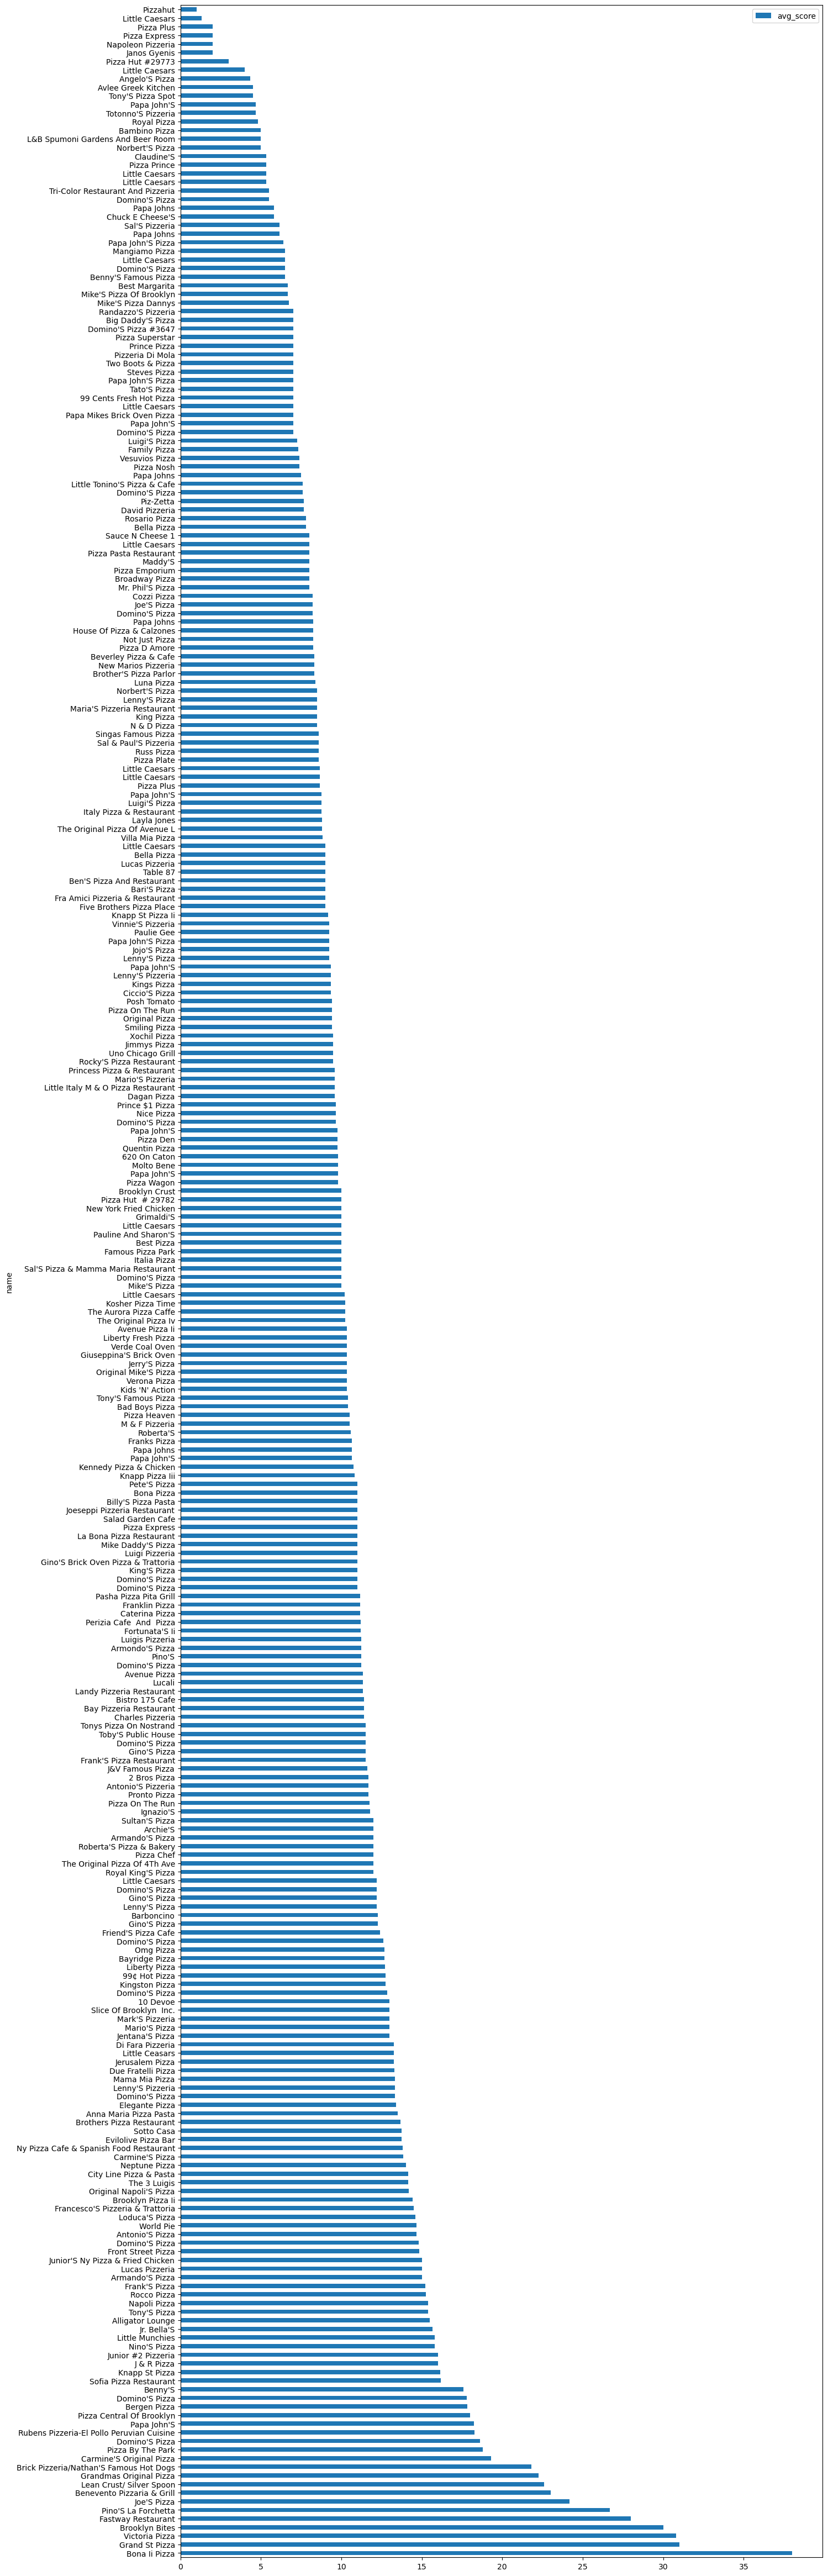

In [76]:
df2.plot(kind='barh', y="avg_score", x='name', figsize=(15,60))

In [20]:
df.describe

<bound method NDFrame.describe of                             _id  \
0      646a22f720cec63db35433b0   
1      646a22f720cec63db35433b1   
2      646a22f720cec63db35433b2   
3      646a22f720cec63db35433b3   
4      646a22f720cec63db35433b4   
...                         ...   
25354  646a22fa20cec63db35496ba   
25355  646a22fa20cec63db35496bb   
25356  646a22fa20cec63db35496bc   
25357  646a22fa20cec63db35496bd   
25358  646a22fa20cec63db35496be   

                                                 address        borough  \
0      {'building': '1007', 'coord': [-73.856077, 40....          Bronx   
1      {'building': '469', 'coord': [-73.961704, 40.6...       Brooklyn   
2      {'building': '351', 'coord': [-73.985135599999...      Manhattan   
3      {'building': '2780', 'coord': [-73.98241999999...       Brooklyn   
4      {'building': '97-22', 'coord': [-73.8601152, 4...         Queens   
...                                                  ...            ...   
25354  {'building': 

In [79]:
df.head(2)

,_id,address,borough,cuisine,grades,name,restaurant_id
0,646a22f720cec63db35433b0,"{'building': '1007', 'coord': [-73.856077, 40....",Bronx,Bakery,"[{'date': 2014-03-03 00:00:00, 'grade': 'A', '...",Morris Park Bake Shop,30075445
1,646a22f720cec63db35433b1,"{'building': '469', 'coord': [-73.961704, 40.6...",Brooklyn,Hamburgers,"[{'date': 2014-12-30 00:00:00, 'grade': 'A', '...",Wendy'S,30112340


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25359 entries, 0 to 25358
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   _id            25359 non-null  object
 1   address        25359 non-null  object
 2   borough        25359 non-null  object
 3   cuisine        25359 non-null  object
 4   grades         25359 non-null  object
 5   name           25359 non-null  object
 6   restaurant_id  25359 non-null  object
dtypes: object(7)
memory usage: 1.4+ MB


In [81]:
df['borough'].value_counts(normalize=True)

Manhattan        0.404551
Brooklyn         0.239994
Queens           0.223037
Bronx            0.092196
Staten Island    0.038211
Missing          0.002011
Name: borough, dtype: float64

<AxesSubplot:ylabel='borough'>

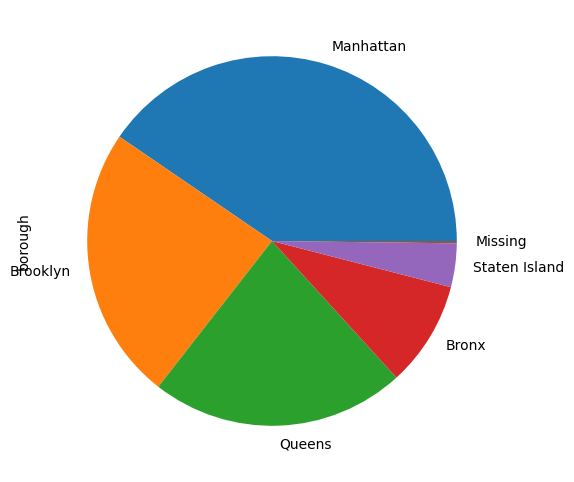

In [82]:
df['borough'].value_counts().plot(kind='pie', figsize=(6,6))

### Frequency of boroughs in data data

Text(0, 0.5, 'Number of Boroughs')

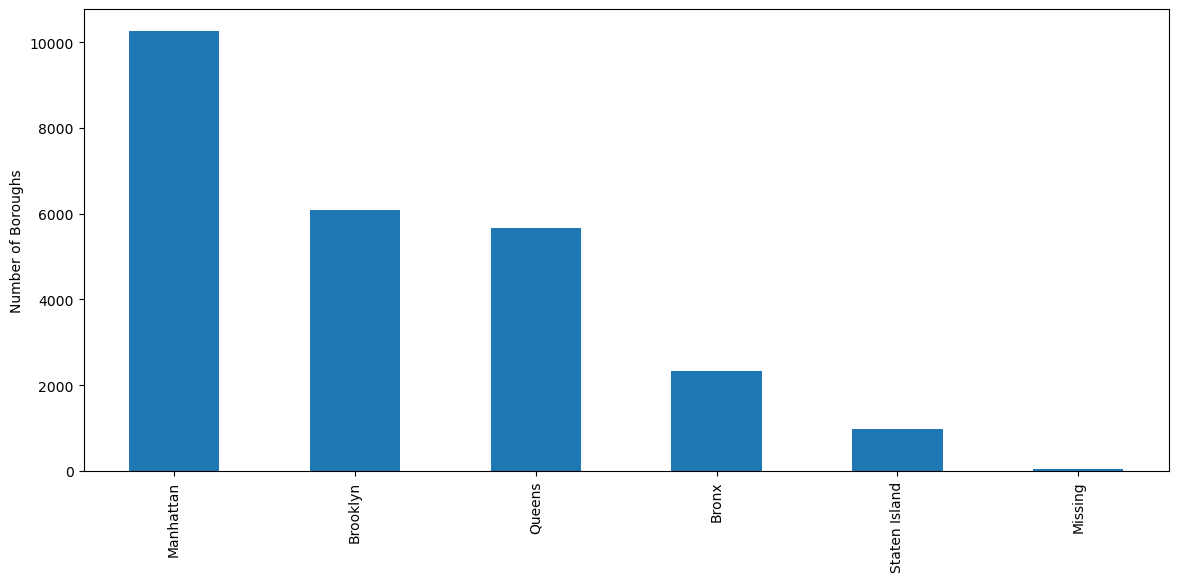

In [83]:
ax = df['borough'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Boroughs')

In [84]:
df.head()

,_id,address,borough,cuisine,grades,name,restaurant_id
0,646a22f720cec63db35433b0,"{'building': '1007', 'coord': [-73.856077, 40....",Bronx,Bakery,"[{'date': 2014-03-03 00:00:00, 'grade': 'A', '...",Morris Park Bake Shop,30075445
1,646a22f720cec63db35433b1,"{'building': '469', 'coord': [-73.961704, 40.6...",Brooklyn,Hamburgers,"[{'date': 2014-12-30 00:00:00, 'grade': 'A', '...",Wendy'S,30112340
2,646a22f720cec63db35433b2,"{'building': '351', 'coord': [-73.985135599999...",Manhattan,Irish,"[{'date': 2014-09-06 00:00:00, 'grade': 'A', '...",Dj Reynolds Pub And Restaurant,30191841
3,646a22f720cec63db35433b3,"{'building': '2780', 'coord': [-73.98241999999...",Brooklyn,American,"[{'date': 2014-06-10 00:00:00, 'grade': 'A', '...",Riviera Caterer,40356018
4,646a22f720cec63db35433b4,"{'building': '97-22', 'coord': [-73.8601152, 4...",Queens,Jewish/Kosher,"[{'date': 2014-11-24 00:00:00, 'grade': 'Z', '...",Tov Kosher Kitchen,40356068


In [ ]:
ax = df['grades'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Number of Grades')

Text(0, 0.5, 'Number of Grades')